In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisquare = lambda chisq,df:stats.ch2.sf(chisq,df)

In [37]:
row_data= pd.read_csv('2.01. Admittance.csv')
row_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [38]:
data= row_data.copy()
data['Admitted']= data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [39]:
y  = data['Admitted']

In [40]:
x1 = data['SAT']

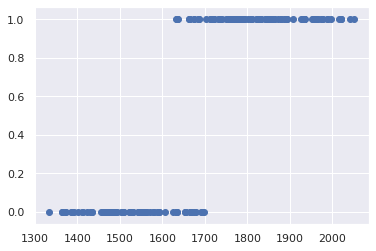

In [41]:
plt.scatter(x1,y)

In [42]:
x= sm.add_constant(x1)

/home/ronit/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
reg_log = sm.Logit(y,x)

In [44]:
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [45]:
reg_summary = results_log.summary()
reg_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Feb 2020   Pseudo R-squ.:                  0.7992
Time:                        12:36:31   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [46]:
data = pd.read_csv('2.02. Binary predictors.csv')

In [47]:
data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [48]:
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

In [49]:
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

In [50]:
y = data['Admitted']


In [51]:
x1= data['Gender']
x1

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    0
165    0
166    0
167    0
Name: Gender, Length: 168, dtype: int64

In [52]:
x

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [53]:
x= sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Feb 2020   Pseudo R-squ.:                  0.1659
Time:                        12:36:31   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [54]:
x1 = data[['SAT','Gender']]

In [55]:
x= sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Feb 2020   Pseudo R-squ.:                  0.8249
Time:                        12:36:31   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [56]:
data.describe()

,SAT,Admitted,Gender
count,168.000000,168.000000,168.000000
mean,1695.273810,0.559524,0.464286
std,183.019017,0.497928,0.500214
min,1334.000000,0.000000,0.000000
25%,1547.500000,0.000000,0.000000
50%,1691.500000,1.000000,0.000000
75%,1844.500000,1.000000,1.000000
max,2050.000000,1.000000,1.000000


In [57]:
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [59]:
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [60]:
type(results_log)

statsmodels.discrete.discrete_model.BinaryResultsWrapper

In [61]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns=['predict 0','predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,predict 0,predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [62]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

In [63]:
test_data = pd.read_csv('2.03. Test dataset.csv')

In [64]:
test_data

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [65]:
test_data['Admitted']=test_data['Admitted'].map({'Yes':1,'No':0})

In [66]:
test_data['Gender']=test_data['Gender'].map({'Female':1,'Male':0})

In [67]:
test_x = test_data[['SAT','Gender']]
test_x = sm.add_constant(test_x)

In [68]:
results_log.predict(test_x)

0     4.416867e-07
1     9.742731e-01
2     9.941557e-01
3     9.781306e-01
4     3.215089e-01
5     3.814192e-02
6     9.797226e-01
7     9.991287e-01
8     9.999936e-01
9     7.308682e-01
10    9.999987e-01
11    9.999999e-01
12    8.638537e-01
13    6.007566e-05
14    8.493951e-01
15    9.999426e-01
16    3.173552e-04
17    4.065056e-03
18    9.998485e-01
dtype: float64

In [69]:
test_actual = test_data['Admitted']
test_data = test_data.drop(['Admitted'], axis = 1)



In [70]:
test_data=sm.add_constant(test_data)

In [81]:
test_x

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [79]:
results_log.pred_table(test_data)

ValueError: Unable to coerce to Series, length must be 3: given 168

In [72]:
test_data = test_data[x.columns.values]
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [77]:
def confusion_matrix(data,actual_values,model):
    
    pred_values = model.predict(data)
    print(pred_values)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    print(cm)
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm , accuracy

In [78]:
cm , accuracy = confusion_matrix(test_data,test_actual,results_log) 

0     4.416867e-07
1     9.742731e-01
2     9.941557e-01
3     9.781306e-01
4     3.215089e-01
5     3.814192e-02
6     9.797226e-01
7     9.991287e-01
8     9.999936e-01
9     7.308682e-01
10    9.999987e-01
11    9.999999e-01
12    8.638537e-01
13    6.007566e-05
14    8.493951e-01
15    9.999426e-01
16    3.173552e-04
17    4.065056e-03
18    9.998485e-01
dtype: float64
[[5.00 1.00]
 [1.00 12.00]]


In [75]:
cm

array([[5.00, 1.00],
       [1.00, 12.00]])

In [76]:
accuracy

0.8947368421052632